In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, pi
from dweepy.streaming import listen_for_dweets_from

In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
INTERVAL = 256

In [5]:
class DweetReader():
    def next(self):
        for d in listen_for_dweets_from("RRRioXYZ", 1000000):
#            print d
            yield (d['content']['x'], d['content']['y'], d['content']['z'])

dreader = DweetReader()
gen = next(dreader)

In [6]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [7]:
def animate3D(i):
    global X
    global Y
    global Z
    global cur_sample
    ax.clear()

    smoothing = 5
    # rotate the samples around x
    rx = cur_sample[0]*np.pi/smoothing
    Rx =[[1   ,   0     ,    0    ],
         [0   , cos(rx) , -sin(rx)],
         [0   , sin(rx) ,  cos(rx)]]
    
    t = np.transpose(np.array([X,Y,Z]), (1,2,0))
    XRot_x,YRot_x,ZRot_x = np.transpose(np.dot(t, Rx), (2,0,1))
    
    # rotate the samples around y
    ry = cur_sample[1]*np.pi/smoothing
                                 
    Rx =[[cos(ry)  ,   0     ,   sin(ry)   ],
         [0        ,   1     , 0           ],
         [-sin(ry) ,   0     ,   cos(ry)   ]]
    
    t = np.transpose(np.array([XRot_x,YRot_x,ZRot_x]), (1,2,0))
    XRot_Y,YRot_Y,ZRot_Y = np.transpose(np.dot(t, Rx), (2,0,1))
                   
    # Plot the surface.
    ax.plot_surface(XRot_Y, YRot_Y, ZRot_Y, cmap=plt.get_cmap('coolwarm'),
                       linewidth=0, antialiased=False)

    fig2.show()
    fig2.canvas.draw()

In [8]:
def animate(i):
    global sensor_dbuf
    global cur_sample
    # sensor data buffer
#    newval = ser.readline()
#    x = float(newval.split()[0])
#    y = float(newval.split()[1])
#    z = float(newval.split()[2])
    #[x, y, z] = read_samples()
    x, y, z = next(gen)
#    print new_val
#    x, y, z = new_val

#    cur_sample = [x,y,z]
    # scale the 90 degree, normalize
    cur_sample = [x / 90., y / 90., z / 90.]
    
    #print ( "x = " , x , "y = " , y , "z = " , z)
    
    #update sensor buffer
    sensor_dbuf[0] = cur_sample
    sensor_dbuf = np.roll(sensor_dbuf,-1,axis=0) # circular shift
    
    xplot.clear()
    yplot.clear()
    zplot.clear()
    
    
    xplot.plot(column(sensor_dbuf,0))
    yplot.plot(column(sensor_dbuf,1))
    zplot.plot(column(sensor_dbuf,2))
    xplot.grid()
    yplot.grid()
    zplot.grid()
    xplot.set_ylim(ymin=-1.0,ymax=1.0)
    yplot.set_ylim(ymin=-1.0,ymax=1.0)
    zplot.set_ylim(ymin=-1.0,ymax=1.0)
    
    fig.show()
    fig.canvas.draw()

In [9]:
sensor_dbuf = [[0 for i in range(3)] for j in range(INTERVAL)]
cur_sample = []

In [10]:
plt.ion()


<IPython.core.display.Javascript object>


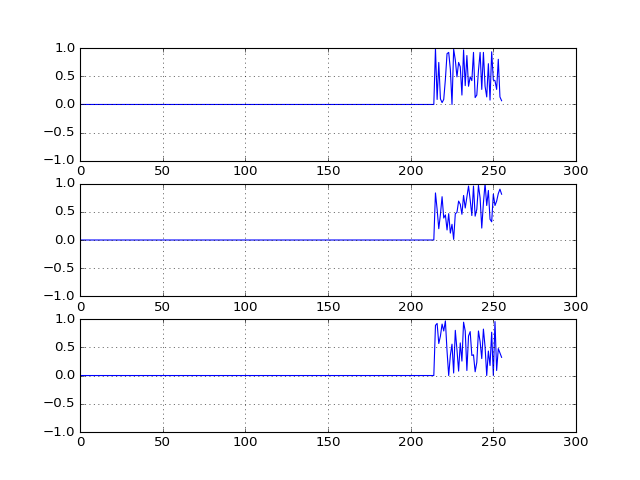

<IPython.core.display.Javascript object>


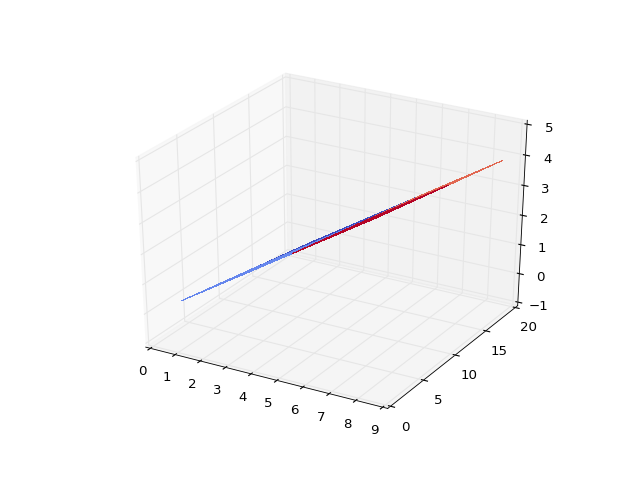

In [11]:
# plot sensor data
fig = plt.figure()
xplot = fig.add_subplot(3,1,1)
yplot = fig.add_subplot(3,1,2)
zplot = fig.add_subplot(3,1,3)

# Make sheet
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

X = np.arange(1, 10, 0.5)
Y = np.arange(1, 20, 1)
X, Y = np.meshgrid(X, Y)
Z = X*0


ani = []
for figcomps in [1,2]:
    if figcomps == 1:
        ani.append(animation.FuncAnimation(fig,animate,interval=1, blit=False))
    else:
        ani.append(animation.FuncAnimation(fig2,animate3D,interval=1, blit=False))

    

In [32]:
fig.show()
fig.canvas.draw()

In [33]:
fig2.show()
fig2.canvas.draw()